In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1. mediapipe 활용 FaceDetection

참고 문헌
- https://google.github.io/mediapipe/solutions/face_detection.html
- https://developers.google.com/mediapipe/solutions/vision/face_detector/python
- https://colab.research.google.com/github/googlesamples/mediapipe/blob/main/examples/face_detector/python/face_detector.ipynb

In [ ]:
!pip install mediapipe

label_id: 0
score: 0.8775297403335571
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3114720582962036
    ymin: 0.32122907042503357
    width: 0.2852746844291687
    height: 0.1605207920074463
  }
  relative_keypoints {
    x: 0.38463205099105835
    y: 0.38915982842445374
  }
  relative_keypoints {
    x: 0.5118367075920105
    y: 0.36908459663391113
  }
  relative_keypoints {
    x: 0.4641296863555908
    y: 0.41999202966690063
  }
  relative_keypoints {
    x: 0.48194724321365356
    y: 0.4446486532688141
  }
  relative_keypoints {
    x: 0.33348602056503296
    y: 0.40563639998435974
  }
  relative_keypoints {
    x: 0.595405638217926
    y: 0.36469289660453796
  }
}

612 1122 560 561
RIGHT_EYE :[0.38463205099105835, 0.38915982842445374 ]
LEFT_EYE :[0.5118367075920105, 0.36908459663391113 ]
Nose :[0.4641296863555908, 0.41999202966690063 ]
Mouse :[0.48194724321365356, 0.4446486532688141 ]
LEFT_EAR :[0.33348602056503296, 0.40563639998435974 ]
LE

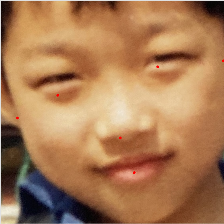

In [ ]:
import cv2
import mediapipe as mp
import os
from glob import glob
from google.colab.patches import cv2_imshow

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

IMAGE_FILES = ['/content/0001_1992_11_00000043_F.png']
with mp_face_detection.FaceDetection(
    # 사용할 모델(0 = 부분적 모델, 1= 전신 모델)과  검출 모델의 최소 감지 신뢰값 설정
    model_selection=1, min_detection_confidence=0.5) as face_detection:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # 작업 전에 BGR 이미지를 RGB로 변환 후 이미지 감지 진행
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

	# 이미지를 출력하고 그 위에 얼굴 박스를 그리기
    # 얼굴 인식 결과가 없으면 다음 이미지 파일로 진행
    if not results.detections:
      continue
    # 원본 이미지 카피
    annotated_image = image.copy()
    for detection in results.detections:
      print(detection)
      # 바운딩 박스 좌표 받기
      bboxC = detection.location_data.relative_bounding_box
      ih, iw, _ = image.shape
      # 바운딩 박스의 좌표를 픽셀 단위로 변환합니다.
      x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                  int(bboxC.width * iw), int(bboxC.height * ih)
      print(x, y, w, h)
      # 랜드마크 좌표 받기
      landmark = detection.location_data.relative_keypoints
      print(f'RIGHT_EYE :[{landmark[0].x}, {landmark[0].y} ]')
      print(f'LEFT_EYE :[{landmark[1].x}, {landmark[1].y} ]')
      print(f'Nose :[{landmark[2].x}, {landmark[2].y} ]')
      print(f'Mouse :[{landmark[3].x}, {landmark[3].y} ]')
      print(f'LEFT_EAR :[{landmark[4].x}, {landmark[4].y} ]')
      print(f'LEFT_EAR :[{landmark[5].x}, {landmark[5].y} ]')

      # 감지된 얼굴에 바운딩 박스와 랜드마크 그리기
      mp_drawing.draw_detection(annotated_image, detection)
      # 박스에 맞춰 이미지 자르기
      cropped = annotated_image[y: y+h, x: x+w]
      resize_image = cv2.resize(cropped, (224,224))
      cv2_imshow(resize_image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()



In [ ]:
import cv2
import mediapipe as mp
import os
from glob import glob
from google.colab.patches import cv2_imshow

source_path = '/content/face/'
IMAGE_FILES = list(glob(source_path + '*.png'))

with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # 작업 전에 BGR 이미지를 RGB로 변환 후 이미지 감지 진행
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

	# 이미지를 출력하고 그 위에 얼굴 박스를 그리기
    # 얼굴 인식 결과가 없으면 다음 이미지 파일로 진행
    if not results.detections:
      continue
    # 원본 이미지 카피
    annotated_image = image.copy()
    for detection in results.detections:
      # print(detection)
      # 바운딩 박스 좌표 받기
      bboxC = detection.location_data.relative_bounding_box
      ih, iw, _ = image.shape
      # 바운딩 박스의 좌표를 픽셀 단위로 변환
      x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                  int(bboxC.width * iw), int(bboxC.height * ih)
      print(x, y, w, h)

      # print('RIGHT_EYE tip:')
      # print(mp_face_detection.get_key_point(
      #     detection, mp_face_detection.FaceKeyPoint.RIGHT_EYE))
      # print('LEFT_EYE tip:')
      # print(mp_face_detection.get_key_point(
      #     detection, mp_face_detection.FaceKeyPoint.LEFT_EYE))
      # print('Nose tip:')
      # print(mp_face_detection.get_key_point(
      #     detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      # print('Mouse tip:')
      # print(mp_face_detection.get_key_point(
      #     detection, mp_face_detection.FaceKeyPoint.MOUTH_CENTER))
      # print('LEFT_EAR tip:')
      # print(mp_face_detection.get_key_point(
      #     detection, mp_face_detection.FaceKeyPoint.LEFT_EAR_TRAGION))

      mp_drawing.draw_detection(annotated_image, detection)
      # 박스에 맞춰 이미지 자르기
      # 랜드마크 표시없이 자르기
      # cropped = image[y: y+h, x: x+w]
      # resize_image = cv2.resize(cropped, (224,224))
      # 랜드마크 표시해서 자르기
      cropped = annotated_image[y: y+h, x: x+w]
      resize_image = cv2.resize(cropped, (224,224))
    cv2.imwrite('/content/Mediapipe/result' + str(idx) + '.png', resize_image)


655 183 409 409
RIGHT_EYE :[0.6039797067642212, 0.3687426447868347 ]
LEFT_EYE :[0.7373117208480835, 0.38721370697021484 ]
Nose :[0.6766210198402405, 0.49046337604522705 ]
Mouse :[0.6703934073448181, 0.57785964012146 ]
LEFT_EAR :[0.5171380043029785, 0.40812212228775024 ]
LEFT_EAR :[0.7931646704673767, 0.4344455599784851 ]
98 92 461 461
RIGHT_EYE :[0.18537850677967072, 0.3009634017944336 ]
LEFT_EYE :[0.33111846446990967, 0.2861630320549011 ]
Nose :[0.2579801082611084, 0.4260817766189575 ]
Mouse :[0.2661367654800415, 0.5220048427581787 ]
LEFT_EAR :[0.12673138082027435, 0.3506094813346863 ]
LEFT_EAR :[0.42134690284729004, 0.3156856894493103 ]


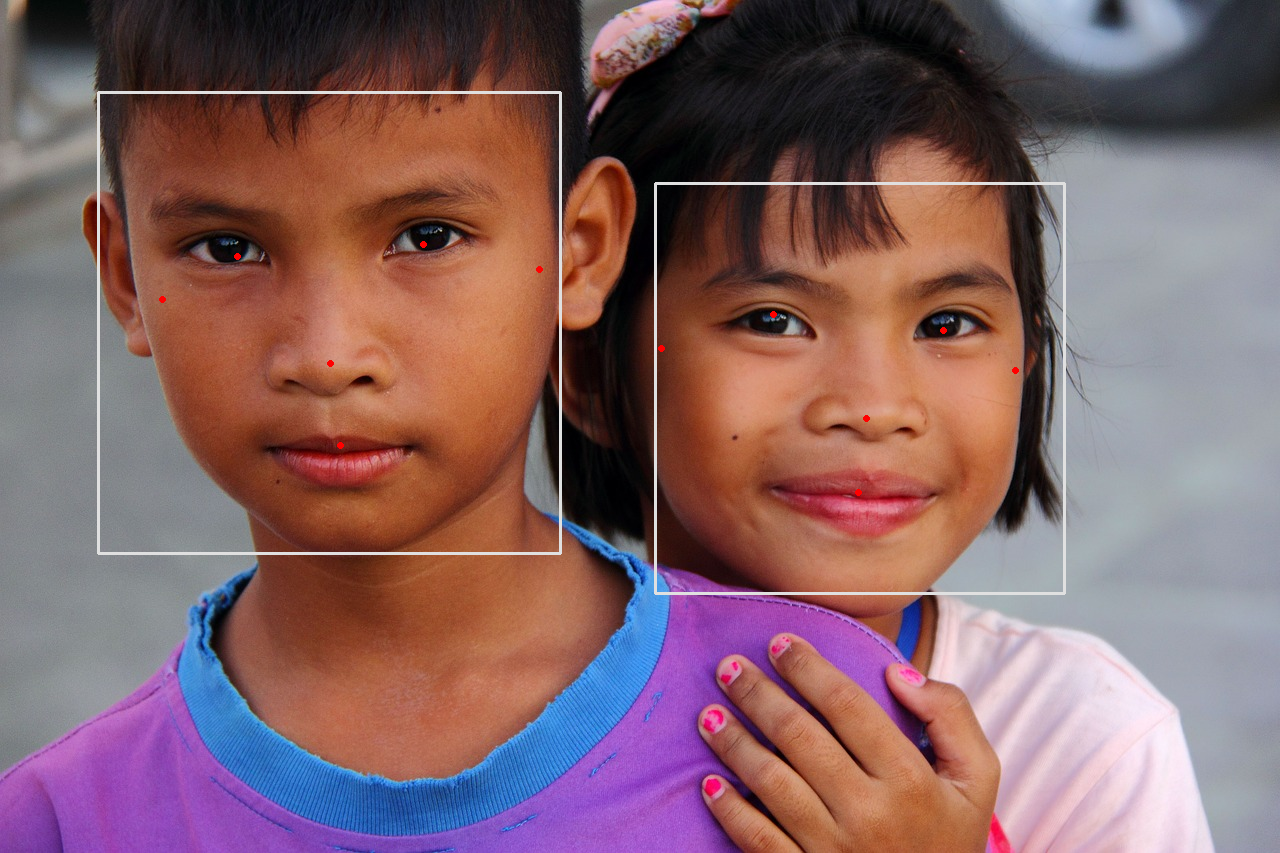

In [ ]:
import cv2
import mediapipe as mp
import os
from glob import glob
from google.colab.patches import cv2_imshow

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

source_path = '/content/face/'
IMAGE_FILES = ['/content/brother-977170_1280.jpg']
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # 작업 전에 BGR 이미지를 RGB로 변환 후 이미지 감지 진행
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

	# 이미지를 출력하고 그 위에 얼굴 박스를 그리기
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      # print(detection)
      bboxC = detection.location_data.relative_bounding_box
      ih, iw, _ = image.shape
      # 바운딩 박스의 좌표를 픽셀 단위로 변환합니다.
      x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                  int(bboxC.width * iw), int(bboxC.height * ih)
      print(x, y, w, h)
      landmark = detection.location_data.relative_keypoints
      print(f'RIGHT_EYE :[{landmark[0].x}, {landmark[0].y} ]')
      print(f'LEFT_EYE :[{landmark[1].x}, {landmark[1].y} ]')
      print(f'Nose :[{landmark[2].x}, {landmark[2].y} ]')
      print(f'Mouse :[{landmark[3].x}, {landmark[3].y} ]')
      print(f'LEFT_EAR :[{landmark[4].x}, {landmark[4].y} ]')
      print(f'LEFT_EAR :[{landmark[5].x}, {landmark[5].y} ]')

      mp_drawing.draw_detection(annotated_image, detection)
    cv2_imshow(annotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
      # cropped = annotated_image[y: y+h, x: x+w]
      # resize_image = cv2.resize(cropped, (224,224))
      # cv2_imshow(resize_image)
      # cv2.waitKey(0)
      # cv2.destroyAllWindows()



## 2. haarcascade 활용 FaceDetection

## 3. MTCNN 활용 FaceDetection

참고 문헌
- https://github.com/ipazc/mtcnn

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.8 MB/s eta 0:00:00


In [147]:
from mtcnn import MTCNN
import cv2

image_path = '/content/0001_1992_11_00000043_F.png'
# 이미지 변환
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
# MTCNN 클래스 생성
detector = MTCNN()
# 얼굴 감지
detections = detector.detect_faces(img)
detections

1/1 [==============================] - 0s 132ms/step


[{'box': [614, 1020, 573, 643],
  'confidence': 0.9999383687973022,
  'keypoints': {'left_eye': (775, 1314),
   'right_eye': (1023, 1267),
   'nose': (923, 1451),
   'mouth_left': (843, 1551),
   'mouth_right': (1043, 1513)}}]

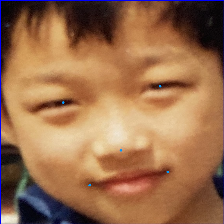

In [118]:
img_with_dets = img.copy()
# 신뢰도 설정
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, w, h = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)

# 바운딩 박스로 이미지 자르기
cropped = img_with_dets[y: y+h, x: x+w]
resize_image = cv2.resize(cropped, (224,224))
resize_image = cv2.cvtColor(resize_image, cv2.COLOR_RGB2BGR)
cv2_imshow(resize_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

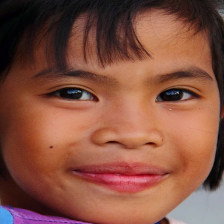

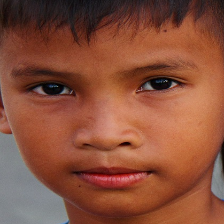

In [126]:
img_with_dets = img.copy()
face_images = []

min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        # 얼굴 영역 잘라내기
        face_img = img[y:y+height, x:x+width]
        resized_face_img = cv2.resize(face_img, (224, 224))
        resized_face_img_bgr = cv2.cvtColor(resized_face_img, cv2.COLOR_RGB2BGR)
        face_images.append(resized_face_img_bgr)

for idx, face_img in enumerate(face_images):
    cv2_imshow(face_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 4. dlib & OpenCv 활용 FaceDetection

In [ ]:
# Facial landmarks with dlib, OpenCV, and PythonPython

import numpy as np
import dlib
import cv2

RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
MOUTH = list(range(48, 68))
NOSE = list(range(27, 36))
EYEBROWS = list(range(17, 27))
JAWLINE = list(range(1, 17))
ALL = list(range(0, 68))
EYES = list(range(36, 48))


predictor_file = './shape_predictor_68_face_landmarks.dat'
image_file = './img.jpg'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_file)

image = cv2.imread(image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)
print("Number of faces detected: {}".format(len(rects)))


for (i, rect) in enumerate(rects):
    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    show_parts = points[ALL]
    for (i, point) in enumerate(show_parts):
        x = point[0,0]
        y = point[0,1]
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        cv2.putText(image, "{}".format(i + 1), (x, y - 2),
		cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)

cv2_imshow(image)
cv2.waitKey(0)


## 5. RetinaFace 활용 FaceDetection

참고 문헌
- https://github.com/serengil/retinaface
- https://tistory-nari.tistory.com/63

In [ ]:
!pip install retina-face

In [188]:
from retinaface import RetinaFace
import cv2

# 이미지 경로
image_path = '/content/0001_1992_29_00000074_D.png'

# 이미지 불러오기
image = cv2.imread(image_path)
resp = RetinaFace.detect_faces(image)
resp

{'face_1': {'score': 0.999426007270813,
  'facial_area': [97, 126, 322, 432],
  'landmarks': {'right_eye': [155.92862, 245.14745],
   'left_eye': [263.9608, 246.48827],
   'nose': [207.33945, 313.72464],
   'mouth_right': [163.53993, 358.74637],
   'mouth_left': [251.87247, 359.50684]}}}

Facial area: [97, 126, 322, 432]
97 126 322 432


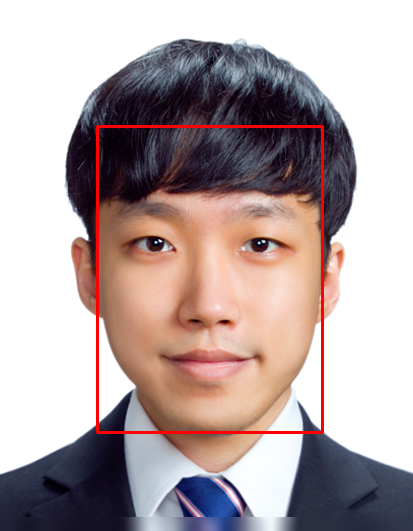

In [191]:
detect_image = image.copy()

# 감지된 얼굴에 사각형 그리기
for face in resp:
  facial_area = resp[face]['facial_area']
  print('Facial area:', facial_area)
  x, y, w, h = facial_area[0], facial_area[1],facial_area[2],facial_area[3]
  print(x,y,w,h)
  cv2.rectangle(detect_image, (x,y), (w,h), (0,0,255), 2)

# #  결과 출력
cv2_imshow(detect_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Facial area: [97, 126, 322, 432]
97 126 322 432


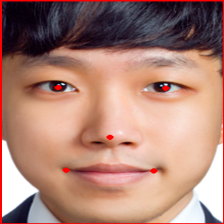

In [204]:
detect_image = image.copy()

# 감지된 얼굴에 사각형 그리기
for face in resp:
  facial_area = resp[face]['facial_area']
  print('Facial area:', facial_area)
  x, y, w, h = facial_area[0], facial_area[1],facial_area[2],facial_area[3]
  cv2.rectangle(detect_image, (x,y), (w,h), (0,0,255), 2)

  # 감지된 얼굴에 랜드마크 그리기
  landmarks = resp[face]['landmarks']
  for landmark in landmarks.values():
    p1, p2 = int(landmark[0]), int(landmark[1])
    cv2.circle(detect_image, (p1,p2), 2, (0,0,255), 2)

# 바운딩 박스로 이미지 자르기
print(x,y,w,h)
cropped = detect_image[y: h, x: w]
resize_image = cv2.resize(cropped, (224,224))
# 결과 출력
cv2_imshow(resize_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Facial area: [99, 14, 116, 37]
Facial area: [46, 21, 64, 44]
Facial area: [154, 14, 172, 38]
Facial area: [278, 18, 296, 40]
Facial area: [330, 14, 348, 37]
Facial area: [218, 22, 236, 45]
Facial area: [199, 109, 218, 132]
Facial area: [269, 93, 287, 117]
Facial area: [127, 109, 147, 136]
Facial area: [67, 99, 85, 125]
Facial area: [342, 80, 361, 104]


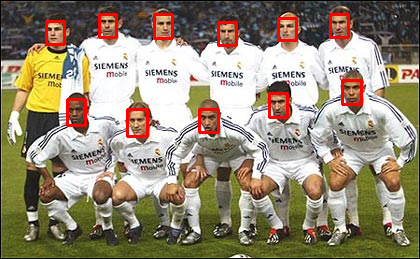

In [231]:
from retinaface import RetinaFace
import cv2

# 이미지 경로
image_path = '/content/soccerteam.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)
resp = RetinaFace.detect_faces(image)
resp

detect_image = image.copy()

# 감지된 얼굴에 사각형 그리기
for face in resp:
  facial_area = resp[face]['facial_area']
  print('Facial area:', facial_area)
  x, y, w, h = facial_area[0], facial_area[1],facial_area[2],facial_area[3]
  cv2.rectangle(detect_image, (x,y), (w,h), (0,0,255), 2)
# 결과 출력
cv2_imshow(detect_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

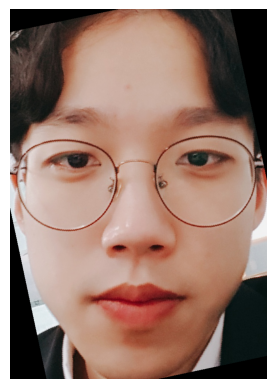

In [218]:
import matplotlib.pyplot as plt

faces = RetinaFace.extract_faces(img_path = "/content/0001_1992_28_00000071_D.png", align = True)
for face in faces:
  plt.imshow(face)
  plt.axis('off')
  plt.show();
  face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
  cv2.imwrite(f"/content/align.jpg", face)

Facial area: [591, 1049, 1224, 1962]
591 1049 1224 1962
591 1049 1224 1962


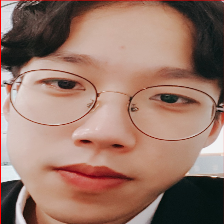

In [228]:
from retinaface import RetinaFace
import cv2

# 이미지 경로
image_path = '/content/0001_1992_28_00000071_D.png'

# 이미지 불러오기
image = cv2.imread(image_path)
resp = RetinaFace.detect_faces(image)
resp

detect_image = image.copy()

# 감지된 얼굴에 사각형 그리기
for face in resp:
  facial_area = resp[face]['facial_area']
  print('Facial area:', facial_area)
  x, y, w, h = facial_area[0], facial_area[1],facial_area[2],facial_area[3]
  print(x,y,w,h)
  cv2.rectangle(detect_image, (x,y), (w,h), (0,0,255), 2)

print(x,y,w,h)
cropped = detect_image[y: h, x: w]
resize_image = cv2.resize(cropped, (224,224))
# 결과 출력
cv2_imshow(resize_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

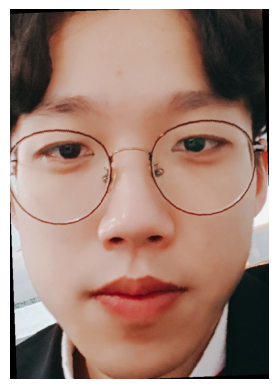

In [226]:
from retinaface import RetinaFace
from retinaface.commons import postprocess
import cv2


# define the target path
img_path = '/content/0001_1992_28_00000071_D.png'

# find landmarks with retinaface ()
result = RetinaFace.detect_faces(img_path)
result
landmarks = result["face_1"]["landmarks"]
left_eye = landmarks["left_eye"]
right_eye = landmarks["right_eye"]
nose = landmarks["nose"]

# align the original image with respect to the eye coordinates
img = cv2.imread(img_path)
img_aligned = postprocess.alignment_procedure(img, right_eye, left_eye, nose)
img_aligned = img_aligned[:,:,::-1]
# plt.imshow(img_aligned)
# plt.show()

# detect facial area on the alreday aligned image
faces = RetinaFace.extract_faces(img_aligned)
plt.imshow(faces[0][:,:,::-1])
plt.axis('off')
plt.show()

In [232]:
list(range(36, 42))

[36, 37, 38, 39, 40, 41]